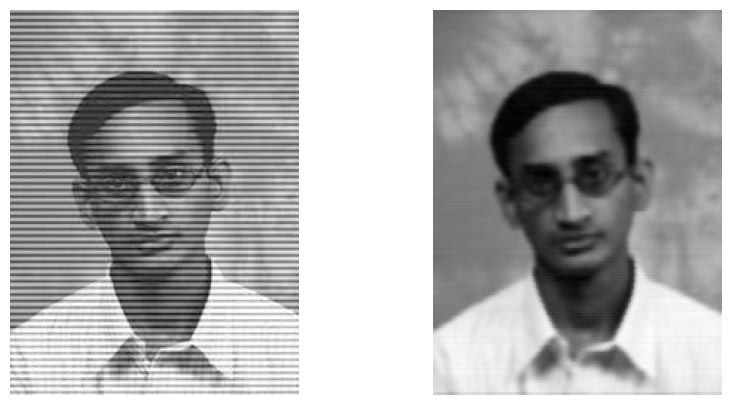

'/Machine-Learning-Simple/noise_denoised.jpg'

In [13]:
from PIL import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = '/Machine-Learning-Simple/noise.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Bilateral Filter twice
bilateral_filtered_image = cv2.bilateralFilter(image, d=6, sigmaColor=150, sigmaSpace=150)
# bilateral_filtered_image = cv2.bilateralFilter(bilateral_filtered_image, d=9, sigmaColor=75, sigmaSpace=75)

# d là kích thước của cửa sổ lọc, sigmaColor là độ biến thiên của màu sắc, sigmaSpace là độ biến thiên của không gian
# nếu ta tăng d lên thì ảnh sẽ trở nên mờ hơn, tăng sigmaColor sẽ giảm nhiễu màu, tăng sigmaSpace sẽ giảm nhiễu không gian
# Save the denoised image
output_path = '/Machine-Learning-Simple/noise_denoised.jpg'
cv2.imwrite(output_path, bilateral_filtered_image)

# Display the processed image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bilateral_filtered_image, cmap='gray')
plt.axis('off')
plt.show()

output_path


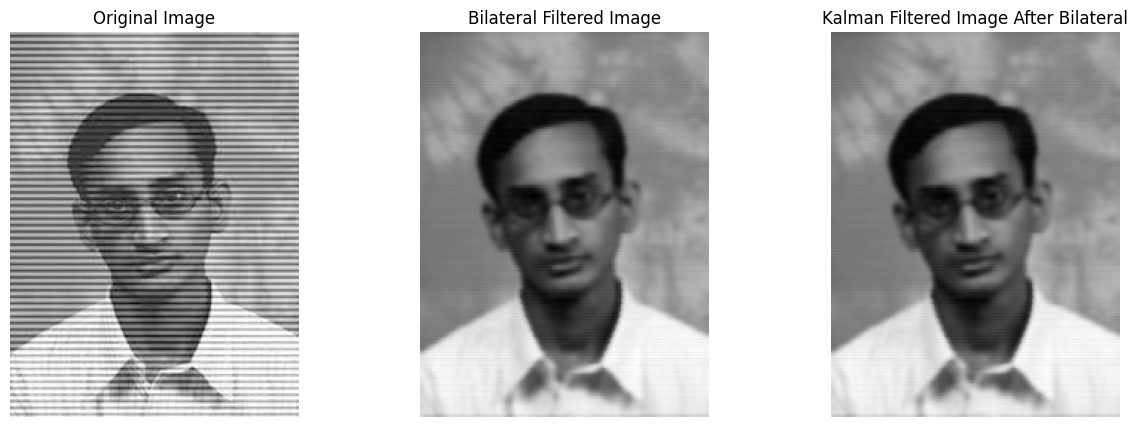

In [44]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define the Kalman Filter function
def kalman_filter(img, process_noise, measurement_noise):
    kalman = cv2.KalmanFilter(4, 2)  # 4 state variables, 2 measurement variables
    
    # Initialize state transition matrix (A), measurement matrix (H), and noise covariances (Q, R)
    kalman.transitionMatrix = np.array([[1, 0, 1, 0],
                                        [0, 1, 0, 1],
                                        [0, 0, 1, 0],
                                        [0, 0, 0, 1]], np.float32)
    kalman.measurementMatrix = np.array([[1, 0, 0, 0],
                                         [0, 1, 0, 0]], np.float32)
    
    kalman.processNoiseCov = np.eye(4, dtype=np.float32) * process_noise
    kalman.measurementNoiseCov = np.eye(2, dtype=np.float32) * measurement_noise
    kalman.errorCovPost = np.eye(4, dtype=np.float32)

    # Initialize the Kalman filter with the first pixel's intensity
    rows, cols = img.shape
    filtered_img = np.zeros_like(img, dtype=np.float32)

    for i in range(rows):
        for j in range(cols):
            kalman.statePre = np.array([img[i, j], img[i, j], 0, 0], np.float32)
            measurement = np.array([img[i, j], img[i, j]], np.float32)
            kalman.correct(measurement)
            prediction = kalman.predict()
            filtered_img[i, j] = prediction[0]

    return np.clip(filtered_img, 0, 255).astype(np.uint8)

# Load the image
image_path = '/Machine-Learning-Simple/noise.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if image is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

# Apply bilateral filter
bilateral_filtered_image = cv2.bilateralFilter(image, d=6, sigmaColor=150, sigmaSpace=200)

# Apply Kalman filter
kalman_filtered_image = kalman_filter(bilateral_filtered_image, process_noise=1, measurement_noise=1e-1) 
# với process_noise và measurement_noise càng nhỏ thì ảnh sẽ càng mờ

# Display the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Bilateral Filtered Image')
plt.imshow(bilateral_filtered_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Kalman Filtered Image After Bilateral')
plt.imshow(kalman_filtered_image_after_bilateral, cmap='gray')
plt.axis('off')

plt.show()
